In [1]:
#Name of File: Victoria_Haley_Homework2
#Date created: 08/24/2023
#Created by: Victoria Haley
#Purpose of program: To write a program that will read in JSON formatted data from a file.

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib import *
import seaborn as sns
import xlrd

# Introduction 

Jeopardy! is arguably the greatest television game show of all time. Having been on air since 1964, countless clues have been read and responded to. Jeopardy! contestants do well when they combine their trivia knowledge with speed and strategy. As such, past contestants have often shared their study methods used to prepare for their competition. Seeing that there are only so many potential clues/categories, this program attempts to provide some insight into understanding whether some categories are more likely to appear than others.

Using the JSON file below from Kaggle, I created a modular program that will run functions to help us better understand Jeopardy! clues from 1984 to 2012. The first three functions are designed to do all of the necessary data preparation, from reading in the data to handling missing values. From there, I use the data to do some investigations into which categories appear the most often, which answers appear the most often, and how many times each category appears in each of the Jeopardy! rounds before finally visualizing the results.

Source: https://www.kaggle.com/datasets/aravindram11/jeopardy-dataset-updated

In [169]:
#function 1: read JSON file and create data frame

def get_data():
    file = 'jeopardy_questions.json'
    with open(file, 'r') as d:
     data = json.loads(d.read())
    df = pd.DataFrame(data)
    return df

In [170]:
#function 2: get general info about entire dataframe

def df_stats(df):
    print(df.head()) #display first 5 rows of dataframe
    print(df.describe()) #display descriptive stats
    print(df.info()) #disply data types
    print(df.isnull().sum()) #checks for any missing values
    

Based on the information from function 2, and knowledge of the game, this is all that needs to be updated so that no math is done on the data. The 'values' that are missing are from daily double responses where contestants can wager any amount. Seeing that those are atypical, they will be removed from the data frame for the purpose of this assignment.

In [171]:
#function 3: data clean up

def clean_data(df):
    df = df.dropna(how='any',axis=0) 
    return df

In [172]:
#function 4: specific summaries

def common_category(df):
    # calculate how many times each 'category' appears in the dataframe:
    category_stats = df['category'].value_counts()
    print(category_stats)

def common_answer(df):
    # calculate how many times each 'answer' appears in the dataframe to see which answer(s) reoccur:
    answer_stats = df['answer'].value_counts()
    print(answer_stats)

def categories_per_round(df):
    #calculate how many times each category was in each jeopardy round
    CPR = pd.crosstab(df["category"], df['round'])
    print(CPR)

In [173]:
#function 5: plotting the summaries from above

def common_category_plot(df):
    # count plot of categories that appear more than 250 times from most to least frequent
    df = df.groupby("category").filter(lambda x: len(x) > 250)
    sns.countplot(x ='category', data = df, order=df['category'].value_counts().index)
    plt.xticks(rotation=45, ha='right',fontsize=5.5)
    plt.title("Common Jeopardy Categories 1984 - 2012")
    # Show the plot
    plt.show()

def common_answers_plot(df):
    # count plot of answers that appear more than 125 times from most to least frequent
    df = df.groupby("answer").filter(lambda x: len(x) > 125)
    sns.countplot(x ='answer', data = df, order=df['answer'].value_counts().index)
    plt.xticks(rotation=45, ha='right',fontsize=6)
    plt.title("Common Jeopardy Answers 1984 - 2012")
    # Show the plot
    plt.show()

def categories_per_round_plot(df):
    # count plot of categories that appear in each jeopary round
    df = df.groupby("category").filter(lambda x: len(x) > 300)
    sns.countplot(x ='category', data = df, hue='round',order=df['category'].value_counts().index)
    plt.xticks(rotation=45, ha='right',fontsize=7)
    plt.title("Jeopardy Categories per Round 1984 - 2012")
    # Show the plot
    plt.show()

                          category    air_date  \
0                          HISTORY  2004-12-31   
1  ESPN's TOP 10 ALL-TIME ATHLETES  2004-12-31   
2      EVERYBODY TALKS ABOUT IT...  2004-12-31   
3                 THE COMPANY LINE  2004-12-31   
4              EPITAPHS & TRIBUTES  2004-12-31   

                                            question value       answer  \
0  'For the last 8 years of his life, Galileo was...  $200   Copernicus   
1  'No. 2: 1912 Olympian; football star at Carlis...  $200   Jim Thorpe   
2  'The city of Yuma in this state has a record a...  $200      Arizona   
3  'In 1963, live on "The Art Linkletter Show", t...  $200  McDonald\'s   
4  'Signer of the Dec. of Indep., framer of the C...  $200   John Adams   

       round show_number  
0  Jeopardy!        4680  
1  Jeopardy!        4680  
2  Jeopardy!        4680  
3  Jeopardy!        4680  
4  Jeopardy!        4680  
              category    air_date        question   value  answer      round  \
count

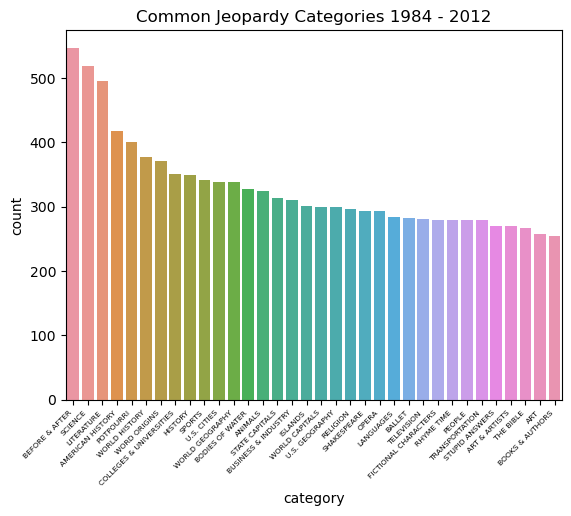

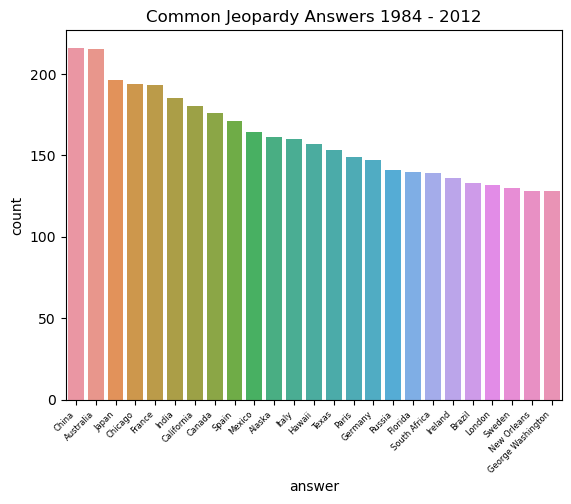

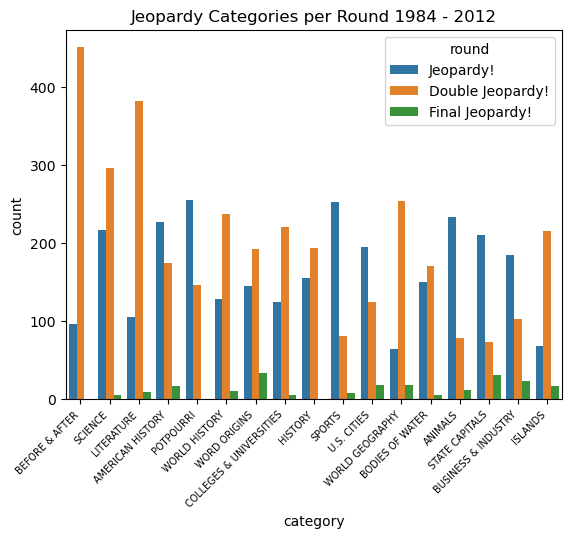

In [174]:
#Calling all functions
df = get_data()
df_stats(df)
clean_data(df)
common_category(df)
common_answer(df)
categories_per_round(df)
common_category_plot(df)
common_answers_plot(df)
categories_per_round_plot(df)

# Conclusion

Based on the results above, the data does shed light on potential trends that underscore the intricacies of Jeopardy! clues. If I were to somehow be a contestant in the future, I would use the following information when preparing:

    - There are a lot of different categories, from Animals to World Origins. However, the most common answers have all been places (with the exception of George Washington).

    - 10/17 of the most common categories appear in the Double Jeopardy round rather than either the Jeopardy or Final Jeopardy rounds. This is a good place to focus as the responses are worth more money in the Double Jeopardy round. 

    - Out of the 17 most common categories, the World Origins category appears the most frequently in Final Jeopardy while American History, Potpurri, Sports, U.S. Cities, Animals, State Capitals, and Business & Industry are more likely to appear in the Jeopardy round.

    - Before $ After, Science, and Literature are the most overall common categories by far.

While the data in this data set is not up to date, it does provide some key takeaways that could be of note for a potential contestant. Although this is not a cheat-sheet for the game, this program provides a look at the results of the exploaratory data analysis of the Jeopardy! data set, as well as visual representations to aid in the interpretation of those results. 